In [ ]:
%ssh-keygen -t ed25519 -C "deploy-key" -f ~/.ssh/deploy_key -N ""
print("Add deploy key below this line into github repo deploy keys.")
%cat ~/.ssh/deploy_key.pub

In [ ]:
git clone git@github%GIT_SSH_COMMAND='ssh -i ~/.ssh/deploy_key -o StrictHostKeyChecking=no' .com:zaitra/methane-filters-benchmark.git

In [ ]:
#ABOVE THIS SHOULD BE DELETED AFTER MAKING THE REPO PUBLIC
#!git clone https://github.com/zaitra/methane-filters-benchmark.git

In [ ]:
%cd methane-filters-benchmark

/Users/jonasherec/methane-filters-benchmark
LICENSE         benchmark/      data/           playbook.ipynb
README.md       csvs/           ntbs/           resources/


# Measuring time
This script measures runtime of the filters, it should be run on the edge device. 
Besides measuring time, it also measures difference berween outputs of the optimized an unoptiomized versions of filters.

In [11]:
!python3 ./benchmark/test_sped_up_filters.py --channels 72 --compute-original-filters
!python3 ./benchmark/test_sped_up_filters.py --channels 72 --compute-original-mag1c

File size: 125.00 MB
Loading hyperspectral image from resources/test_tile_512_512_125.hdr..., selected channels N: 72
resources/test_tile_512_512_125.hdr
Initial_shape:  (512, 512, 125)
After channel selection:  (512, 512, 72)
Compute Original Mag1c:  False
Computing Tile-wise Mag1c...
MAG1C Output:

Filter processing completed in 1.833571195602417 seconds.

Filter processing completed in 1.5240278244018555 seconds (measured similarly as for other filters).

Computing Tile-wise and Sampled Mag1c...
MAG1C Output:
Computation Done! Processing time: 0.0983 seconds

Filter processing completed in 0.360490083694458 seconds.

Filter processing completed in 0.09829306602478027 seconds (measured similarly as for other filters).

Loading methane spectrum for generated file from mag1c: mag1c_spectrum.npy...
Computing with precision: float<class 'numpy.float64'>
Computing ACE_optimized...
ACE_optimized Computation Done! Processing time: 0.2669 seconds
Computing ACE_original...
ACE_original Comput

# Product creation
This script processes STARCOP data and creates the matched filter products from them.
It is showcased on one strong plume example.

In [16]:
import os
!gdown 1XPnxp0cL7Kiq65GdpxDy88OaNSublYNl
os.makedirs("./STARCOP_all_bands_one_tile")
!unzip STARCOP_all_bands_one_tile.zip -d ./STARCOP_all_bands_one_tile
!rm STARCOP_all_bands_one_tile.zip

Downloading...
From (original): https://drive.google.com/uc?id=1XPnxp0cL7Kiq65GdpxDy88OaNSublYNl
From (redirected): https://drive.google.com/uc?id=1XPnxp0cL7Kiq65GdpxDy88OaNSublYNl&confirm=t&uuid=03c862a2-deb1-4e1f-92c9-59ad208d9818
To: /Users/jonasherec/methane-filters-benchmark/STARCOP_all_bands_one_tile.zip
100%|████████████████████████████████████████| 117M/117M [00:04<00:00, 28.4MB/s]
Archive:  STARCOP_all_bands_one_tile.zip
   creating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/
  inflating: ./STARCOP_all_bands_one_tile/__MACOSX/._ang20191025t165545_r6573_c24_w151_h151  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/TOA_AVIRIS_2249nm.tif  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/TOA_AVIRIS_1673nm.tif  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151_h151/TOA_AVIRIS_2129nm.tif  
  inflating: ./STARCOP_all_bands_one_tile/ang20191025t165545_r6573_c24_w151

In [23]:
import yaml
path = "benchmark/cfg/one_tile.yaml"
with open(path, 'r') as f:
        config = yaml.safe_load(f)
print(config)
# Update specified fields
config['csv_path'] = "./STARCOP_all_bands_one_tile/test.csv"
config['input_data_path'] = "./STARCOP_all_bands_one_tile/"
config["output_data_path"] = "output_show"

with open(path, 'w') as f:
    yaml.safe_dump(
        config,
        f,
        sort_keys=False,              # preserve original key order
        default_flow_style=None       # keeps some inline formatting, e.g. lists
    )

{'COLUMN': False, 'CREATE_TILE_MAG1C': True, 'CREATE_SAMPLED_MAG1C': True, 'SAMPLE_PERCENT': 0.01, 'SELECT_BANDS': False, 'BANDS_N': 72, 'STRATEGY': 'highest-transmittance', 'CREATE_OTHER_FILTERS': True, 'RESUME': False, 'PRECISION': 64, 'USE_SPED_UP_VERSIONS_OF_FILTERS': True, 'wavelengths_range': [2122, 2488], 'csv_path': './STARCOP_all_bands_one_tile/test.csv', 'input_data_path': './STARCOP_all_bands_one_tile/', 'output_data_path': 'output_show'}


In [28]:
!python3 ./benchmark/create_filters_for_starcop.py --config benchmark/cfg/one_tile.yaml

1it [00:00, 897.56it/s]
The wavelengths data are same across all tiles.
The wavelengths data from the spectrum file matches the loaded bands.
  0%|                                                     | 0/1 [00:00<?, ?it/s]MAG1C Output:
Beginning processing of 0ac9bea5
Using compute device: cpu.
Computing with precision float64. Output will be written as float32.
Opening radiance data file.
Target spectrum generated successfully.
Checking that the provided target is compatible with the data file wavelengths...
Target spectrum checks complete.
Filter output will be written to 0ac9bea5_ch4_cmfr.hdr
Beginning main filtering, to be completed in 1 steps:
1, Computation Done! Processing time: 1.2448 seconds

Filter processing completed in 1.6761209964752197 seconds.

Filter processing completed in 1.2447788715362549 seconds (measured similarly as for other filters).
Done with all requested processing for 0ac9bea5

MAG1C Output:
Beginning processing of 0ac9bea5
Using compute device: cpu.
Compu

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/ace.tif


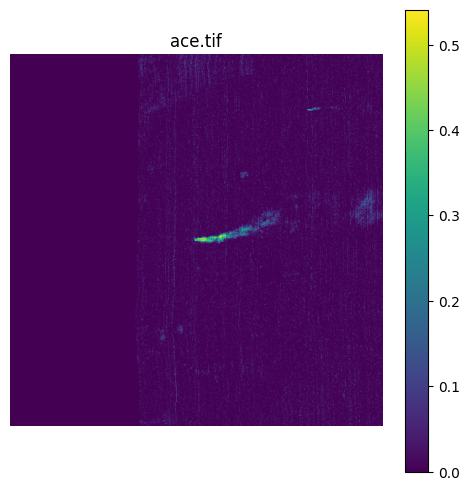

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/labelbinary.tif


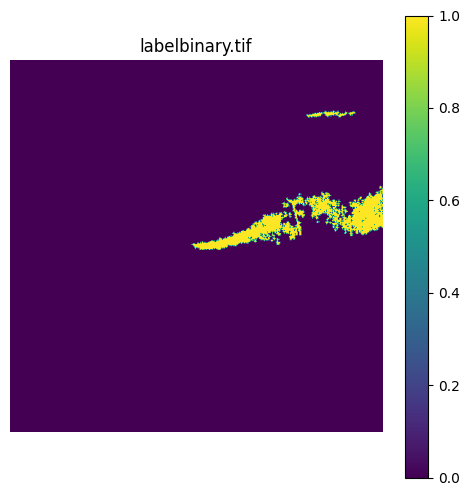

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/mf.tif


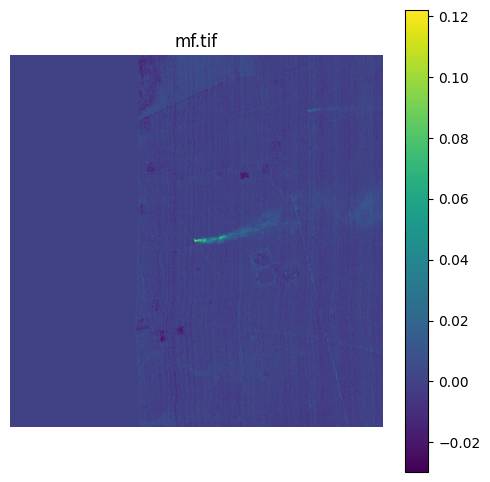

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/cem.tif


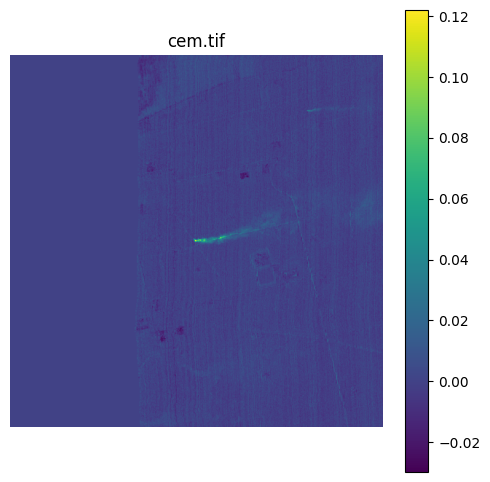

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/mag1c_tile_sampled-0.01.tif


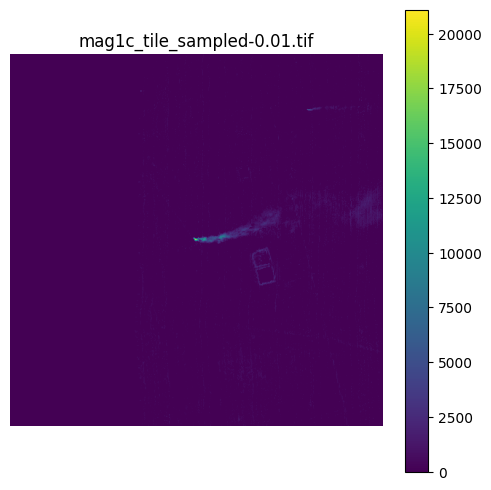

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/mag1c_tile.tif


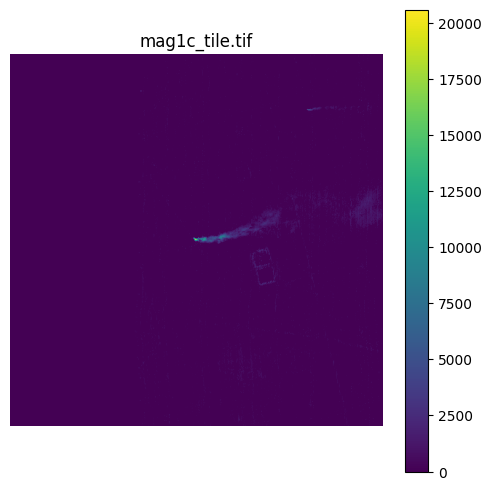

Displaying: output_show/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191025t165545_r6573_c24_w151_h151/valid_mask.tif


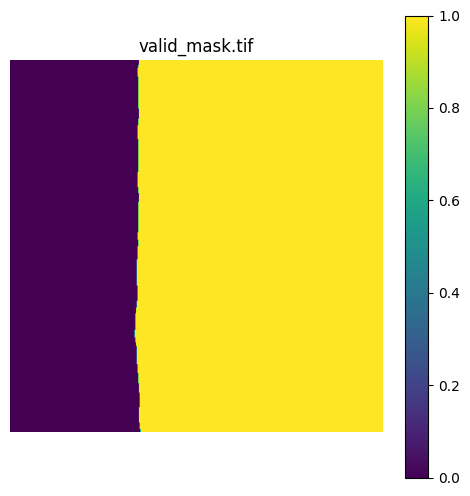

In [31]:
import os
import matplotlib.pyplot as plt
import rasterio

# Set the directory containing the .tif files
tif_directory = config["output_data_path"]  # Change this if needed

# Traverse the directory
for root, dirs, files in os.walk(tif_directory):
    for file in files:
        if file.lower().endswith((".tif")):
            file_path = os.path.join(root, file)
            print(f"Displaying: {file_path}")

            # Open and read the image
            with rasterio.open(file_path) as src:
                img = src.read(1)  # Read the first band

            # Plot the image
            plt.figure(figsize=(6, 6))
            plt.imshow(img)
            plt.title(file)
            plt.colorbar()
            plt.axis('off')
            plt.show()